In [1]:
from citipy import citipy
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import requests as req
import json
import numpy as np
import datetime 
today = datetime.datetime.today().strftime('%Y-%m-%d')

In [2]:
#define weather api
api_key = "b71c226b6a8579c4a0d0fbe47b3c0297"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [3]:
#randomly generating latitude and longitude into dataframe
city_df = pd.DataFrame()
city_df["Latitude"] = ([(np.random.uniform(-90, 90)) for x in range (1500)])
city_df["Longitude"] = ([(np.random.uniform(-180, 180)) for x in range (1500)])

city_df.head()



,Latitude,Longitude
0,23.015482,111.072289
1,-88.690201,96.628784
2,-85.935001,21.254388
3,64.239622,-112.161734
4,-44.145301,122.277443


In [4]:
#Generating city names using citipy
city_list = []
for index, row in city_df.iterrows():
    city=citipy.nearest_city(row["Latitude"],row["Longitude"])
    city_list.append(city.city_name)
city_df["City"] = city_list

city_df.head()



,Latitude,Longitude,City
0,23.015482,111.072289,nandu
1,-88.690201,96.628784,albany
2,-85.935001,21.254388,bredasdorp
3,64.239622,-112.161734,yellowknife
4,-44.145301,122.277443,albany


In [5]:
#Getting rid of duplicates
clean_city_df = city_df.drop_duplicates(['City'], keep='last')
clean_city_df['City'].value_counts()

dabola              1
nakusp              1
belmonte            1
busselton           1
avarua              1
mar del plata       1
port hedland        1
omboue              1
marzuq              1
palmer              1
fort saint james    1
kamina              1
andra               1
kill                1
minas               1
dikson              1
yekaterinoslavka    1
rumonge             1
miyako              1
kaitangata          1
srednekolymsk       1
sarankhola          1
mutis               1
geraldton           1
winslow             1
cap malheureux      1
sahbuz              1
russell             1
batemans bay        1
kashi               1
                   ..
barrow              1
nishihara           1
tura                1
mayo                1
cockburn town       1
mahebourg           1
saleaula            1
buzmeyin            1
ocos                1
sturgeon bay        1
prince rupert       1
bambous virieux     1
rairangpur          1
tilichiki           1
carlet    

In [6]:
for index, row in clean_city_df.iterrows(): 
    city = row["City"]
    query_url = url + "&units=" + units + "&appid=" + api_key + "&q=" + city
    
    pull = req.get(query_url).json()
    print(pull)    
    
weather_data_pd = pd.DataFrame(pull) 
weather_data_pd.head()

{'coord': {'lon': 119.33, 'lat': 31.44}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1021, 'humidity': 93, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 3000, 'wind': {'speed': 2.24}, 'clouds': {'all': 90}, 'dt': 1516557600, 'sys': {'type': 1, 'id': 7447, 'message': 0.0047, 'country': 'CN', 'sunrise': 1516489238, 'sunset': 1516526871}, 'id': 6957978, 'name': 'Nandu', 'cod': 200}
{'coord': {'lon': 8.57, 'lat': 7.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.02, 'pressure': 1003.8, 'humidity': 37, 'temp_min': 84.02, 'temp_max': 84.02, 'sea_level': 1020.68, 'grnd_level': 1003.8}, 'wind': {'speed': 3.71, 'deg': 352.005}, 'clouds': {'all': 0}, 'dt': 1516560234, 'sys': {'message': 0.004, 'country': 'NG', 'sunrise': 1516513454, 'sunset': 1516555817}, 'id': 2338660, 'name': 'Yaan', 'cod': 200}
{'coord': {'lon': 6.79

{'coord': {'lon': 29.07, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 68.63, 'pressure': 907.66, 'humidity': 93, 'temp_min': 68.63, 'temp_max': 68.63, 'sea_level': 1022.06, 'grnd_level': 907.66}, 'wind': {'speed': 2.3, 'deg': 208.505}, 'clouds': {'all': 8}, 'dt': 1516560240, 'sys': {'message': 0.0042, 'country': 'ZM', 'sunrise': 1516507039, 'sunset': 1516552380}, 'id': 176555, 'name': 'Kawambwa', 'cod': 200}
{'coord': {'lon': -95.91, 'lat': 46.98}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 24.06, 'pressure': 1017, 'humidity': 92, 'temp_min': 21.2, 'temp_max': 28.4}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 1}, 'dt': 1516558500, 'sys': {'type': 1, 'id': 1500, 'message': 0.0056, 'country': 'US', 'sunrise': 1516543175, 'sunset': 1516576279}, 'id': 5024237, 'name': 'Callaway', 'cod': 200}
{'

KeyboardInterrupt: 

In [7]:
#Create empty dataframes
clean_city_df["Temperture"] = ""
clean_city_df["Clouds"] = ""
clean_city_df["Humidity"] = ""
clean_city_df["Wind Speed"] = ""

# Counter
row_count = 1

# Loop through 
for index, row in clean_city_df.iterrows(): 
    city = row["City"]
    query_url = url + "&units=" + units + "&appid=" + api_key + "&q=" + city

    #Print city urls
    #print("This is city number " + str(row_count))
    #print(query_url)
    row_count = row_count + 1

    pull = req.get(query_url).json()
    #print(pull)
    try:
     cloud = pull['clouds']['all']
     humidity = pull['main']['humidity']
     temp = pull['main']['temp_max']
     wind = pull['wind']['speed']
     clean_city_df.set_value(index, "Temperture", temp)
     clean_city_df.set_value(index, "Clouds", cloud)
     clean_city_df.set_value(index, "Humidity", humidity)
     clean_city_df.set_value(index, "Wind Speed", wind)
     print("good")
    except:
     print("bad")

C:\Users\Neil Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Neil Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neil Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
bad
good
good
good
bad
good
good
good
good
good
bad
bad
good
good
good
good
good
bad
good
bad
good
good
good
good
good
good
good
good
good
good
good
good
good
bad
bad
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
bad
good
bad
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
bad
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
good
good
good
good
good
good
good
bad
good
good
good
good
bad
good
bad
good
good
good
good
bad
good
good
good


In [8]:
print(clean_city_df)

       Latitude   Longitude           City Temperture Clouds Humidity  \
0     23.015482  111.072289          nandu       42.8     90       93   
6     31.816404   99.291705           yaan      84.02      0       37   
9      0.985631    5.034159       abonnema       82.4     75       69   
11     6.302675  -77.252916          mutis      77.72     80      100   
13    -0.759457  -48.656726          soure       55.4     75       87   
14    42.320177  -72.732471    easthampton       46.4     75       52   
16    -5.662283   36.047086         msanga      65.93     12       92   
20   -26.370083   44.523252         beloha      73.31     68       71   
21    49.862493   37.512382      dvorichna      13.91      8       85   
30    18.499033   97.505667   mae hong son       55.4      0       85   
34    60.971815  101.487165       vanavara     -23.53     36       69   
35   -30.406530  130.760560       flinders       62.6      0       93   
37     9.546380  -70.364076       trujillo         

In [9]:
clean_city_df['Temperture'] = pd.to_numeric(clean_city_df['Temperture'])
clean_city_df['Clouds'] = pd.to_numeric(clean_city_df['Clouds'])
clean_city_df['Humidity'] = pd.to_numeric(clean_city_df['Humidity'])
clean_city_df['Wind Speed'] = pd.to_numeric(clean_city_df['Wind Speed'])

C:\Users\Neil Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Neil Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Neil Gandhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [10]:
clean_city_df = clean_city_df.dropna(how='any')

In [11]:
clean_city_df.count()

Latitude      554
Longitude     554
City          554
Temperture    554
Clouds        554
Humidity      554
Wind Speed    554
dtype: int64

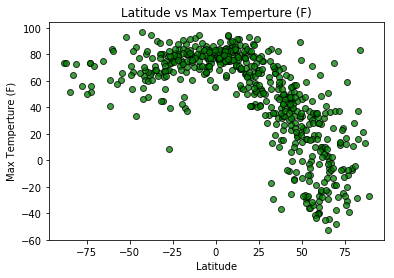

In [12]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Temperture"], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs Max Temperture (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (F)")

plt.show()

plt.savefig("Latitude vs Max Temperture")

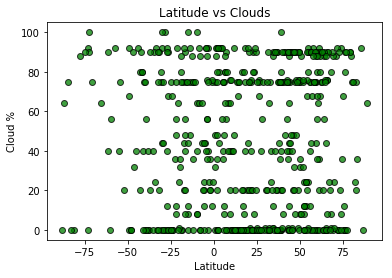

In [13]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Clouds"], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs Clouds")
plt.xlabel("Latitude")
plt.ylabel("Cloud %")

plt.show()

plt.savefig("Latitude vs Clouds")

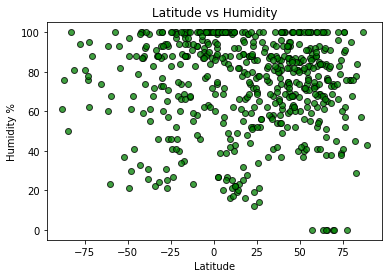

In [14]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Humidity"], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")


plt.show()

plt.savefig("Latitude vs Humidity")

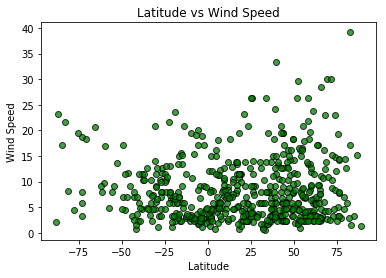

In [15]:
plt.scatter(clean_city_df["Latitude"], clean_city_df["Wind Speed"], marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

plt.savefig("Latitude vs Wind Speed")